#Predicting Top Scorers in the English Premier League 
By Arshad Roshan, Mihir Subhedar, Tejas Sreeram

# Introduction

The English Premier League is hailed as one of the top football leagues in the world. It is regarded by many as the most competitive league and is home to the best players from around the world. Performing in the EPL is not easy, and there is a huge demand for players that can score goals in the league. 
 
In this tutorial, we will analyze the shooting data of players in the English Premier League for the 2017-18, 2018-19, 2019-20, 2020-21 seasons. We will explore the importance of several key statistics like shot accuracy, expected goals, and penalties among others to predict the top scoring players for the current season of 2021-2022.
 
The process we will use includes data cleaning and processing. It will also include an analysis and visualization through plots such as scatter plots, bar graphs, and a heatmap to better understand which attributes impact the goals scored by players. Lastly we will use a machine learning model, specifically the RandomForest model, to train the data and predict the top goalscorers in the Premier League for the season of 2021-2022.
 
The following libraries are required for this analysis:
 
1. Pandas
2. Numpy
3. Matplotlib
4. Seaborn
5. Sklearn 
 
**NOTE:** Here are some useful links for documentation on panda dataframes and how to plot them 
1. https://pandas.pydata.org/docs/reference/frame.html
2. https://matplotlib.org/stable/api/pyplot_summary.html
 
 



### Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection and Cleaning

## About the data

We get our data from FBref.com, a website dedicated to tracking and reporting statistics for football teams and players across the world. We are using their shooting data for players from the English Premier League during the 2020-21 season. 

https://fbref.com/en/comps/9/10728/shooting/2020-2021-Premier-League-Stats

The FBref website allows us to export the Player Shooting table as a .csv file, which we use for our data.

*Data Collection:*
For data collection and creating a data frame, the library we used was:
1. pandas

*The following data is from the 2020-2021 season to show how we obtained and cleaned our data* 

In [ ]:
import pandas as pd # Library required for creating and manipulating data frame
# Using 2020-21 season as example for cleaning data
df = pd.read_csv("playershooting2021.csv") # File was placed in repository and was read to create dataframe
df # Output

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Standard,Standard.1,Standard.2,Standard.3,Standard.4,Standard.5,Standard.6,Standard.7,Standard.8,Performance,Performance.1,Expected,Expected.1,Expected.2,Expected.3,Expected.4,Unnamed: 25
0,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
1,1,Patrick van Aanholt\5f09991f,nl NED,DF,Crystal Palace,29,1990,19.7,0,18,6,33.3,0.91,0.30,0.00,0.00,20.3,3,0,0,1.2,1.2,0.07,-1.2,-1.2,Matches
2,2,Tammy Abraham\f586779e,eng ENG,FW,Chelsea,22,1997,11.6,6,32,13,40.6,2.77,1.13,0.19,0.46,9.7,0,0,0,6.4,6.4,0.20,-0.4,-0.4,Matches
3,3,Che Adams\f2bf1b0f,sct SCO,FW,Southampton,24,1996,29.6,9,56,31,55.4,1.89,1.05,0.16,0.29,13.1,0,0,0,8.8,8.8,0.16,+0.2,+0.2,Matches
4,4,Tosin Adarabioyo\c81d773d,eng ENG,DF,Fulham,22,1997,32.8,0,20,5,25.0,0.61,0.15,0.00,0.00,8.8,0,0,0,1.1,1.1,0.05,-1.1,-1.1,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,528,Andi Zeqiri\d01231f0,ch SUI,FWDF,Brighton,21,1999,1.9,0,7,2,28.6,3.68,1.05,0.00,0.00,13.1,0,0,0,0.6,0.6,0.09,-0.6,-0.6,Matches
529,529,Oleksandr Zinchenko\51cf8561,ua UKR,DF,Manchester City,23,1996,16.4,0,16,4,25.0,0.97,0.24,0.00,0.00,21.9,1,0,0,0.7,0.7,0.05,-0.7,-0.7,Matches
530,530,Hakim Ziyech\6622454d,ma MAR,FWMF,Chelsea,27,1993,13.0,2,35,12,34.3,2.69,0.92,0.06,0.17,21.8,0,0,0,1.9,1.9,0.05,+0.1,+0.1,Matches
531,531,Kurt Zouma\ce4246f5,fr FRA,DF,Chelsea,25,1994,22.5,5,27,12,44.4,1.20,0.53,0.19,0.42,12.2,0,0,0,1.8,1.8,0.07,+3.2,+3.2,Matches


## Data Cleaning

**Part 1:**
 
There were many problems with the initial dataframe we were able to read from, so we fixed it using the following library:
1. pandas
 
The problems with the initial data frame included wrong column names, unnecessary columns, improper cell values with additional text, and confusing column names. To fix these issues we did the following:
 
1.   Make the first row of the data frame the actual column names 
  *   The initial column names were 'unnamed' and the proper column names were in the first row
2.   Drop the Rank ("Rk") column
  * This column is unnecessary for our data analysis and should be dropped
3. Remove unnecessary characters from the player names column
  * The player names had additional character text after a '\\' and all of that text had to be removed
4. Remove unnecessary characters from the nationality column
  * The nationalities also had unneeded characters before the nation was given, so we removed those as well
5. Remove secondary positions for each player
  * Some of the players played more than one position, so we decided to keep only the primary position
6. Drop the "Born", "G-xG", "np:G-xG", and "Matches" columns
  * These columns are unnecessary for our data analysis and should be removed
7. Rename certain columns to have less confusing names
  * Certain column names were acronyms or confusing and had to changed
 
**NOTE:** Here are some useful links for information on cleaning and tidying data:
1. https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf 
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
 
 



In [ ]:
df.columns = df.iloc[0] # Renamed the columns with the first row values
df = df.drop(0) # Dropped the first row since it was not needed anymore
df = df.drop(['Rk'], axis=1) # Dropped the 'RK' column
# Removed all characters including and after '\' for the 'Player' column
df['Player'] = df['Player'].str.split(pat="\\").str[0] 
# Removed all uncapitalized characters from the 'Nation' column
df['Nation'] = df['Nation'].str.replace(r'[a-z]', '')
# Keep only the first two characters (first position) of the 'Pos' column
df['Pos'] = df['Pos'].str[:2]
df=df.drop(columns = ["Born", "G-xG", "np:G-xG", "Matches"]) # Drop columns
# Rename certain columns to better names
df.rename(columns={"Sh/90": "Shots per game", "SoT/90": "SoT per game", "Pos": "Position", "Squad": "Team", "Gls": "Goals", "Sh": "Shots", "xG": "Exp_Goals", }, inplace=True)
df.head() # Output

,Player,Nation,Position,Team,Age,90s,Goals,Shots,SoT,SoT%,Shots per game,SoT per game,G/Sh,G/SoT,Dist,FK,PK,PKatt,Exp_Goals,npxG,npxG/Sh
1,Patrick van Aanholt,NED,DF,Crystal Palace,29,19.7,0,18,6,33.3,0.91,0.30,0.00,0.00,20.3,3,0,0,1.2,1.2,0.07
2,Tammy Abraham,ENG,FW,Chelsea,22,11.6,6,32,13,40.6,2.77,1.13,0.19,0.46,9.7,0,0,0,6.4,6.4,0.20
3,Che Adams,SCO,FW,Southampton,24,29.6,9,56,31,55.4,1.89,1.05,0.16,0.29,13.1,0,0,0,8.8,8.8,0.16
4,Tosin Adarabioyo,ENG,DF,Fulham,22,32.8,0,20,5,25.0,0.61,0.15,0.00,0.00,8.8,0,0,0,1.1,1.1,0.05
5,Adrián,ESP,GK,Liverpool,33,3.0,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN


In addition to the previous steps, we also did the following to clean up the data:
8. Remove all players with "GK" as a position
  * "GK" stands for "Goalkeeper" and many goalkeepers either had 0 or NaN for the amount of goals they scored, making their data not needed. "GK" players would populate the data and would not be beneficial to finding the top scorers of the 2021-2022 season. 



In [ ]:
for index, row in df.iterrows(): # Iterate through each index
    if row['Position'] == 'GK': # Find any players who are goalkeepers
        df = df.drop(index) # Remove that row
df.head() # Output -> *Notice: index 5 was removed because the player was a goalkeeper*

,Player,Nation,Position,Team,Age,90s,Goals,Shots,SoT,SoT%,Shots per game,SoT per game,G/Sh,G/SoT,Dist,FK,PK,PKatt,Exp_Goals,npxG,npxG/Sh
1,Patrick van Aanholt,NED,DF,Crystal Palace,29,19.7,0,18,6,33.3,0.91,0.30,0.00,0.00,20.3,3,0,0,1.2,1.2,0.07
2,Tammy Abraham,ENG,FW,Chelsea,22,11.6,6,32,13,40.6,2.77,1.13,0.19,0.46,9.7,0,0,0,6.4,6.4,0.20
3,Che Adams,SCO,FW,Southampton,24,29.6,9,56,31,55.4,1.89,1.05,0.16,0.29,13.1,0,0,0,8.8,8.8,0.16
4,Tosin Adarabioyo,ENG,DF,Fulham,22,32.8,0,20,5,25.0,0.61,0.15,0.00,0.00,8.8,0,0,0,1.1,1.1,0.05
6,Sergio Agüero,ARG,FW,Manchester City,32,6.2,4,17,10,58.8,2.74,1.61,0.18,0.30,13.9,0,1,2,3.4,1.8,0.11


We also did a NaN check:
 
9. Replace all NaN values 
  * Much of the data had NaN values and the best way to remove these NaN values was by replacing them with 0. This is because many of the NaN values were Goals per Shot, Goals per Shots on Target, and Distance. Additionally, the value of these players' Goals were all zero, meaning the values of the NaN columns would be zero anyways. 
 
**NOTE**: Here are some useful links for NaN values and missing data:
1. https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html



In [ ]:
df[df.isna().any(axis=1)].head() # Outputting all rows with any NaN values 

,Player,Nation,Position,Team,Age,90s,Goals,Shots,SoT,SoT%,Shots per game,SoT per game,G/Sh,G/SoT,Dist,FK,PK,PKatt,Exp_Goals,npxG,npxG/Sh
26,Elliot Anderson,SCO,MF,Newcastle Utd,17,0.0,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN
27,Felipe Anderson,BRA,FW,West Ham,27,0.0,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN
34,Charlie Austin,ENG,FW,West Brom,31,1.5,0,3,0,0.0,1.96,0.00,0.00,NaN,19.3,0,0,0,0.2,0.2,0.07
38,Eric Bailly,CIV,DF,Manchester Utd,26,10.2,0,2,0,0.0,0.20,0.00,0.00,NaN,10.0,0,0,0,0.1,0.1,0.05
43,Phil Bardsley,SCO,DF,Burnley,35,3.0,0,4,0,0.0,1.31,0.00,0.00,NaN,25.8,0,0,0,0.1,0.1,0.03


In [ ]:
df = df.fillna(0) # Replacing NaN values with 0
df[df.isna().any(axis=1)] # Output -> *Notice: There are no more NaN values*

,Player,Nation,Position,Team,Age,90s,Goals,Shots,SoT,SoT%,Shots per game,SoT per game,G/Sh,G/SoT,Dist,FK,PK,PKatt,Exp_Goals,npxG,npxG/Sh


Lastly, we had to make sure the values in each cell were of the proper type:
10. Change the data types for certain columns
  * All data was in the form of 'String' and some of the columns had to be changed to int or float data types


In [ ]:
int_cols = ["Age", "Goals", "SoT", "FK", "PK", "PKatt"] # These columns should be changed to type int
no_change_cols = ['Player', "Nation", "Position", "Team"] # These columns types should not be changed 
for cols in df.columns: 
  if not cols in no_change_cols: # If the column is not in the 'no_change_cols' array
    if cols in int_cols: # If it should be converted to type int
       df[cols] = df[cols].astype(int)
    else: # If it should not be converted to type int, then it will be converted to type float
      df[cols] = df[cols].astype(float)
df # Final output for what the cleaned data should be

,Player,Nation,Position,Team,Age,90s,Goals,Shots,SoT,SoT%,Shots per game,SoT per game,G/Sh,G/SoT,Dist,FK,PK,PKatt,Exp_Goals,npxG,npxG/Sh
1,Patrick van Aanholt,NED,DF,Crystal Palace,29,19.7,0,18.0,6,33.3,0.91,0.30,0.00,0.00,20.3,3,0,0,1.2,1.2,0.07
2,Tammy Abraham,ENG,FW,Chelsea,22,11.6,6,32.0,13,40.6,2.77,1.13,0.19,0.46,9.7,0,0,0,6.4,6.4,0.20
3,Che Adams,SCO,FW,Southampton,24,29.6,9,56.0,31,55.4,1.89,1.05,0.16,0.29,13.1,0,0,0,8.8,8.8,0.16
4,Tosin Adarabioyo,ENG,DF,Fulham,22,32.8,0,20.0,5,25.0,0.61,0.15,0.00,0.00,8.8,0,0,0,1.1,1.1,0.05
6,Sergio Agüero,ARG,FW,Manchester City,32,6.2,4,17.0,10,58.8,2.74,1.61,0.18,0.30,13.9,0,1,2,3.4,1.8,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,Andi Zeqiri,SUI,FW,Brighton,21,1.9,0,7.0,2,28.6,3.68,1.05,0.00,0.00,13.1,0,0,0,0.6,0.6,0.09
529,Oleksandr Zinchenko,UKR,DF,Manchester City,23,16.4,0,16.0,4,25.0,0.97,0.24,0.00,0.00,21.9,1,0,0,0.7,0.7,0.05
530,Hakim Ziyech,MAR,FW,Chelsea,27,13.0,2,35.0,12,34.3,2.69,0.92,0.06,0.17,21.8,0,0,0,1.9,1.9,0.05
531,Kurt Zouma,FRA,DF,Chelsea,25,22.5,5,27.0,12,44.4,1.20,0.53,0.19,0.42,12.2,0,0,0,1.8,1.8,0.07


**Part 2:**
 
This is part 2 of data cleaning. Essentially, the following code does the same thing as the last part; however, this time we will add the 2017-18, 2018-19, and 2019-20 seasons to the data frame including the 2020-21 season. In addition to the previous steps, we will also be adding two new columns: "Season" and "yearIndex". In the code below, the "Season" column represents the season of the data frame (e.g. 2017-18, 2018-19, etc.)



In [ ]:
df1718 = pd.read_csv("playershooting1718.csv") # Loading new dataframe (2017-18)
df1718['Season'] = "2017-18" # Creating 'Season' column for 2017-18 data frame

df1819 = pd.read_csv("playershooting1819.csv") # Loading new dataframe (2018-19)
df1819['Season'] = "2018-19" # Creating 'Season' column for 2018-19 data frame

df1920 = pd.read_csv("playershooting1920.csv") # Loading new dataframe (2019-20)
df1920['Season'] = "2019-20" # Creating 'Season' column for 2019-20 data frame

# A new data frame with only players who have scored; Season 2020-21
only_goals_df = df.loc[df['Goals'] >= 1] 

df2021 = df # Copying 2020-21 data frame to new data frame
df2021['Season'] = "2020-21" # Creating 'Season' column for 2020-21 data frame

dfhist = pd.concat([df1718,df1819,df1920]) # Add all the data frames to dfhist

# Clean all the data using the steps shown in part 1
dfhist.columns = dfhist.iloc[0]
dfhist = dfhist.drop(0)
dfhist = dfhist.drop(['Rk'], axis=1)
dfhist['Player'] = dfhist['Player'].str.split(pat="\\").str[0]
dfhist['Nation'] = dfhist['Nation'].str.replace(r'[a-z]', '')
dfhist['Pos'] = dfhist['Pos'].str[:2]
dfhist=dfhist.drop(columns = ["Born", "G-xG", "np:G-xG", "Matches"])
dfhist.rename(columns={"Sh/90": "Shots per game", "SoT/90": "SoT per game", "Pos": "Position", "Squad": "Team", "Gls": "Goals", "Sh": "Shots", "xG": "Exp_Goals","2017-18":"Season"}, inplace=True)
dfhist = dfhist.reset_index(drop=True)

for index, row in dfhist.iterrows():
    if row['Position'] == 'GK':
        dfhist = dfhist.drop(index)

dfhist = dfhist.fillna(0)
int_cols = ["Age", "Goals", "SoT", "FK", "PK", "PKatt"]
no_change_cols = ['Player', "Nation", "Position", "Team","Season"]

for cols in dfhist.columns: 
  if not cols in no_change_cols:
    if cols in int_cols: 
       dfhist[cols] = dfhist[cols].astype(int)
    else: 
      dfhist[cols] = dfhist[cols].astype(float)

dfhist = pd.concat([dfhist,df])
dfhist.head()

,Player,Nation,Position,Team,Age,90s,Goals,Shots,SoT,SoT%,Shots per game,SoT per game,G/Sh,G/SoT,Dist,FK,PK,PKatt,Exp_Goals,npxG,npxG/Sh,Season
0,Patrick van Aanholt,NED,DF,Crystal Palace,26,24.3,5,33.0,11,33.3,1.36,0.45,0.15,0.45,22.3,4,0,0,3.4,3.4,0.10,2017-18
1,Rolando Aarons,ENG,FW,Newcastle Utd,21,1.5,0,2.0,0,0.0,1.29,0.00,0.00,0.00,20.6,0,0,0,0.2,0.2,0.08,2017-18
2,Tammy Abraham,ENG,FW,Swansea City,19,19.2,5,42.0,13,31.0,2.19,0.68,0.12,0.38,12.3,0,0,0,6.7,6.7,0.16,2017-18
3,Charlie Adam,SCO,MF,Stoke City,31,4.6,0,10.0,2,20.0,2.19,0.44,0.00,0.00,32.8,3,0,1,1.2,0.4,0.04,2017-18
5,Ibrahim Afellay,NED,MF,Stoke City,31,1.8,0,0.0,0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0.0,0.0,0.00,2017-18


The following code adds a "yearIndex" column. The yearIndex is a value (0, 1, 2, 3) that represents each season for easy access to that season only. 
* 0-> 2017-18
* 1-> 2018-19
* 2-> 2019-20
* 3-> 2020-21

In [ ]:
# Creating a function that maps a 'Season' value to an int value
def categorise(row):  
    if row["Season"] == "2017-18":
      return 0
    elif row["Season"] == "2018-19":
      return 1
    elif row["Season"] == "2019-20":
      return 2
    else:
      return 3

# Mapping each 'Season' value to the yearIndex 
dfhist['yearIndex'] = dfhist.apply(lambda row: categorise(row), axis=1)

The following code creates a new dataframe for the 2021-22 season. This new dataframe is only used for the machine learning portion and will not be used at the moment. 

In [ ]:
df2122 = pd.read_csv("playershooting2122.csv") # Creating a dataframe for the current season: 2021-22

# Cleaning the data using the steps from part 1
df2122.columns = df2122.iloc[0]
df2122 = df2122.drop(0)
df2122 = df2122.drop(['Rk'], axis=1)
df2122['Player'] = df2122['Player'].str.split(pat="\\").str[0]
df2122['Age'] = df2122['Age'].str.split(pat="-").str[0]
df2122['Nation'] = df2122['Nation'].str.replace(r'[a-z]', '')
df2122['Pos'] = df2122['Pos'].str[:2]
df2122=df2122.drop(columns = ["Born", "G-xG", "np:G-xG", "Matches"])
df2122.rename(columns={"Sh/90": "Shots per game", "SoT/90": "SoT per game", "Pos": "Position", "Squad": "Team", "Gls": "Goals", "Sh": "Shots", "xG": "Exp_Goals","2017-18":"Season"}, inplace=True)
df2122 = df2122.reset_index(drop=True)

for index, row in df2122.iterrows():
    if row['Position'] == 'GK':
        df2122 = df2122.drop(index)

df2122 = df2122.fillna(0)
int_cols = ["Age", "Goals", "SoT", "FK", "PK", "PKatt"]
no_change_cols = ['Player', "Nation", "Position", "Team","Season"]

for cols in df2122.columns: 
  if not cols in no_change_cols:
    if cols in int_cols: 
       df2122[cols] = df2122[cols].astype(int)
    else: 
      df2122[cols] = df2122[cols].astype(float)

df2122.head()

,Player,Nation,Position,Team,Age,90s,Goals,Shots,SoT,SoT%,Shots per game,SoT per game,G/Sh,G/SoT,Dist,FK,PK,PKatt,Exp_Goals,npxG,npxG/Sh
0,Max Aarons,ENG,DF,Norwich City,21,17.0,0,9.0,2,22.2,0.53,0.12,0.00,0.00,20.2,0,0,0,0.6,0.6,0.06
1,Che Adams,SCO,FW,Southampton,25,9.5,3,21.0,11,52.4,2.20,1.15,0.14,0.27,14.5,0,0,0,2.4,2.4,0.11
2,Rayan Aït Nouri,FRA,DF,Wolves,20,8.0,0,6.0,2,33.3,0.75,0.25,0.00,0.00,15.1,0,0,0,0.3,0.3,0.05
3,Kristoffer Ajer,NOR,DF,Brentford,23,6.3,0,2.0,0,0.0,0.32,0.00,0.00,0.00,9.9,0,0,0,0.2,0.2,0.09
4,Nathan Aké,NED,DF,Manchester City,26,4.5,1,2.0,1,50.0,0.45,0.22,0.50,1.00,6.0,0,0,0,0.3,0.3,0.14


# Understanding the features

Before going into data analysis it is important to understand the features and what each feature represents. This means we will go through the following features:

1. 'PK': 'PK' stands for the penalty kicks a player has scored
2. 'PKatt': 'PKatt' stands for the penalty kicks a player has attempted
3. 'Shots': 'Shots' stands for the number of times a player has attempted to shoot the ball into the goal
4. 'SoT': 'SoT' stands for the shots on target a player has. Shots on target are shots a player has made that the goalie has had to manually stop from going into the goal.
5. 'npxG': 'npxG' stands for the non-penalty expected goals a player has scored 
6. 'Exp_Goals': 'Exp_Goals' stands for the expected number of goals a player should have scored for the season
7. 'Goals': 'Goals' stands for the number of goals a player scored in the season


**NOTE:** Here is a useful link if you are interested in the Premier League:
1. https://www.premierleague.com/

# Exploratory Data Analysis

To kickoff our analysis of these datasets, we created a heatmap to determine the correlation between all of the variables across the dataset to help gauge any patterns on relationships that exist between the variables. 
 
The matrix below is this heatmap, it helps showcase the correlation between the variables in our entire dataset. In the matrix below, the darker, reddish boxes represent variables that are highly correlated. Lighter cells indicate a weaker correlation. 
 
Since we aim to predict the top goal scorers, we need to focus on which variables have a strong relationship with the Goals variable. 
 
**NOTES:** Here is a useful link on heatmaps:
1. https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c



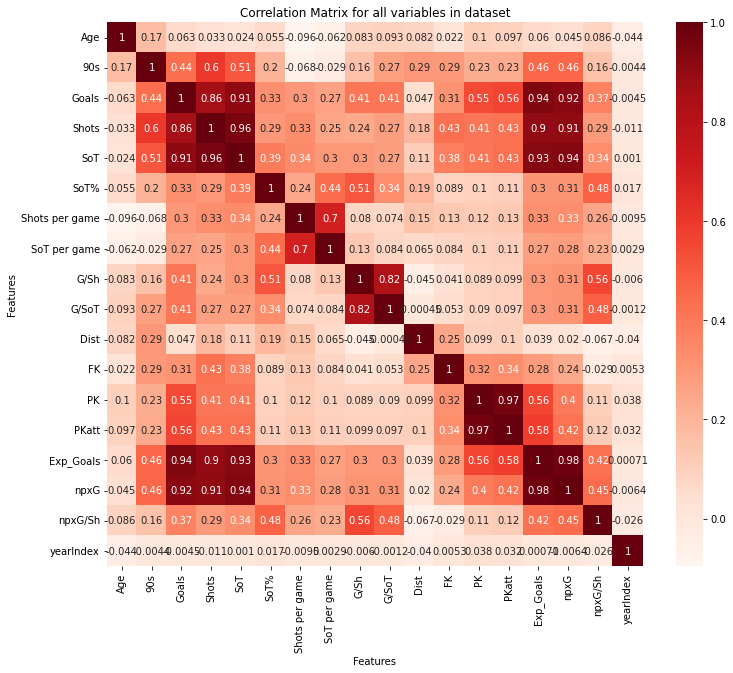

In [ ]:
# Plot a heatmap based on the combined data from the past 4 seasons
plt.figure(figsize=(12,10))
cor = dfhist.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# New
plt.title("Correlation Matrix for all variables in dataset")
plt.ylabel("Features")
plt.xlabel("Features")
plt.show()

The heatmap above displays a wide array of correlations between the variables from the dataset. Focusing on the Goals column, we can see that it holds quite a strong correlation with some of the variables, which we will show in the code below.

However, since we will be using this data to predict the top scorers for the next season, we must try and get a clearer understanding of which variables hold a strong correlation with Goals. 

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Goals"])
print(type(cor_target))
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
# New
relevant_features.sort_values()

<class 'pandas.core.series.Series'>


0
PK           0.546950
PKatt        0.562561
Shots        0.861014
SoT          0.913765
npxG         0.920665
Exp_Goals    0.941077
Goals        1.000000
Name: Goals, dtype: float64

In the code above, we use column indexing to get the series of correlations with Goals and look at the variables that have a correlation of greater than 0.5. A correlation greater than 0.5 will be indicative of a relationship between a variable and Goals, however, this does not guarantee a *strong* correlation and we will need to look closer at the relationship between these variables.

As we can see, the variables with the strongest correlation are the expected goals, the expected goals minus penalties, and the number of shots on target. We will also explore the relationship between goals and the remaining variables displayed above as a correlation greater than 0.5 is still relatively strong and can be a good predictor. 

## Exploring relationship between goals and correlated variables



The following few blocks of code are using creating scatter plots

**NOTE:** Here is a useful link on scatter plots 
1. https://www.jmp.com/en_us/statistics-knowledge-portal/exploratory-data-analysis/scatter-plot.html

### Relationship between shots and goals

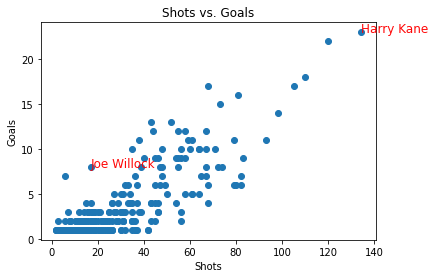

In [ ]:
fig1, ax1 = plt.subplots()
ax1.scatter(only_goals_df["Shots"], only_goals_df["Goals"])
plt.title("Shots vs. Goals")
plt.xlabel("Shots")
plt.ylabel("Goals")

ax1.text(only_goals_df.Shots[only_goals_df.Player=="Harry Kane"], only_goals_df.Goals[only_goals_df.Player=="Harry Kane"],"Harry Kane", fontdict=dict(color="red", alpha=10, size=12))
ax1.text(only_goals_df.Shots[only_goals_df.Player=="Joe Willock"], only_goals_df.Goals[only_goals_df.Player=="Joe Willock"],"Joe Willock", fontdict=dict(color="red", alpha=10, size=12))

plt.show()

This plot shows helps understand the relation between Shots taken by a player and their total goals scored. Looking back to the results of our heatmap, we know that the two variables have a correlation of 0.86. This indicates a strong positive relationship between the two, which is also reflected from the graph above. 

The graph also helps us notice players that are especially efficient with their shooting, and players who simply take a large number of shots, resulting in a higher number of goals. This is evident from the two labeled points on the graph, Joe Willock and Harry Kane. Harry Kane is a striker, meaning he is given a lot more opportunities to take shots and score goals in games, while Joe Willock is a midfielder, so he occasionally gets the opportunity to score goals. From the plot, we can see that Joe is very efficient with his shooting, as he scored almost every shot he took during this season. However, Harry Kane is quite different due to his position, he has the freedom of taking as many shots as he possibly can, so he does not need to be concerned about efficiency, just that he scores at least one of the shots he takes. While this does not affect the correlation of the two variables, it does speak to the variations we see in the plot, and what could be causing them. 

We also notice number of shots taken by player begins to taper off after around 40 shots,however, past this point of 40 shots, we also see an increase in the number of goals scored as players past this range are forwards who get many opportunities to take shots, and in turn have a higher probability of scoring goals. 

### Relationship between shots on target and goals

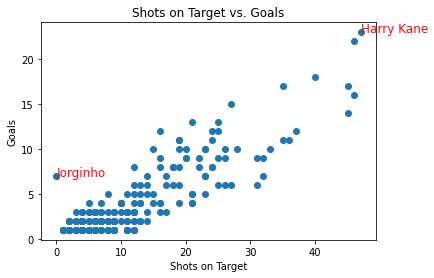

In [ ]:
# Plot Shots on Target vs. Goals
fig1, ax1 = plt.subplots()
ax1.scatter(only_goals_df["SoT"], only_goals_df["Goals"])
plt.title("Shots on Target vs. Goals")
plt.xlabel("Shots on Target")
plt.ylabel("Goals")

ax1.text(only_goals_df.SoT[only_goals_df.Player=="Harry Kane"], only_goals_df.Goals[only_goals_df.Player=="Harry Kane"],"Harry Kane", fontdict=dict(color="red", alpha=10, size=12))
ax1.text(only_goals_df.SoT[only_goals_df.Player=="Jorginho"], only_goals_df.Goals[only_goals_df.Player=="Jorginho"],"Jorginho", fontdict=dict(color="red", alpha=10, size=12))

plt.show()

Similar to the previous plot, this scatter plot of shots on target against goals scored reiterates the strong positive correlation between the two variables. The heatmap represented these two fields to have a correlation score of 0.91, and this seems feasible as the plot shows the positive, increasing trend between shots on target and goals scored. 

However, there is an outlier that has been highlighted, which is Jorginho. Initially, it did not make sense how a player could have 0 shots on target, while also having any goals scored. But, after further analysis of our dataset, we found that this outlier exists because the data does not count penalties attempted as shots on target. Going back to Jorginho, we looked at his statistics and saw that every goal he scored this season was from a penalty! This made it very clear as to why his point seemed to not only be an outlier, but also impossible. While this is surprising, it does show the importance of penalties scored as a feature when analysing the goals scored by players, especially since it can skew the data for other variables, such as shots on target. 

### Relationship between expected goals and goals

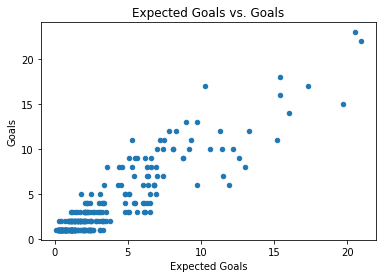

<Figure size 720x720 with 0 Axes>

In [ ]:
# Plot Goals vs Expected Goals
only_goals_df.plot.scatter(x='Exp_Goals',y='Goals')
ax = plt.gca()
plt.ylabel("Goals")
plt.xlabel("Expected Goals")
plt.title("Expected Goals vs. Goals")
plt.figure(figsize=(10,10)) 
plt.show()

This scatter plot is a representation of he expected goals against the actual goals scored. The heatmap indicated that this is pair of variables had a correlation score of 0.94, which is the highest correlation score the goals variable has with any of the others from the dataset. This was something we expected since the expected goals feature is an indicator for the goals variable. However, we will explore this relationship in more detail when discussing our prediction model. 

Based on this plot, we can see a positive, increasing relationship, supporting the results of the heatmap. We noted the large amount of clustering that is present at the bottom left of the plot, which we attributed to the large number of players that only score one goal in a season. Usually, these are defenders or midfielders who get very few opportunities to score, hence their expected goals is 0. 

The graph supports the results of the heatmap and makes it evident that expected goals must be included as a predictor to have a successful machine learning model.

### Relationship between non-penalty expected goals and goals

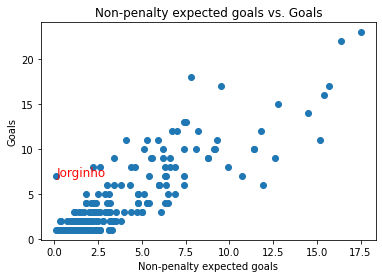

In [ ]:
# Plot Shots on Target vs. Goals
fig1, ax1 = plt.subplots()
ax1.scatter(only_goals_df["npxG"], only_goals_df["Goals"])
plt.title("Non-penalty expected goals vs. Goals")
plt.xlabel("Non-penalty expected goals")
plt.ylabel("Goals")

ax1.text(only_goals_df.npxG[only_goals_df.Player=="Jorginho"], only_goals_df.Goals[only_goals_df.Player=="Jorginho"],"Jorginho", fontdict=dict(color="red", alpha=10, size=12))

plt.show()

This scatter plot is a representation of he expected goals against the actual goals scored. The heatmap indicated that this is pair of variables had a correlation score of 0.94, which is the highest correlation score the goals variable has with any of the others from the dataset. This was something we expected since the expected goals feature is an indicator for the goals variable. However, we will explore this relationship in more detail when discussing our prediction model. 

Based on this plot, we can see a positive, increasing relationship, supporting the results of the heatmap. We noted the large amount of clustering that is present at the bottom left of the plot, which we attributed to the large number of players that only score one goal in a season. Usually, these are defenders or midfielders who get very few opportunities to score, hence their expected goals is 0. 

The graph supports the results of the heatmap and makes it evident that expected goals must be included as a predictor to have a successful machine learning model. 


##Understanding Penalties and its relationship with goals

One finding from the heatmap that was interesting to us was the strong correlation penalties scored has with goals scored. From our perspective, we did not see how the two were related. To answer this question, we decided to plot the top 25 goalscorers for the last 4 seasons and split them based on whether or not they scored at least one penalty that season. 

Our goal with this plot was to get a better understanding of how common it is for the top scorers to also be the designated penalty taker for their team. If there is a clear relationship between the two, we will know that it is an important feature to include in our predictive model.

In [ ]:
only_goals_df_hist = []
for i in range(4):
  only_goals_df_hist.append(dfhist[dfhist["yearIndex"] == i].sort_values(by=['Goals'], ascending=False).head(25))

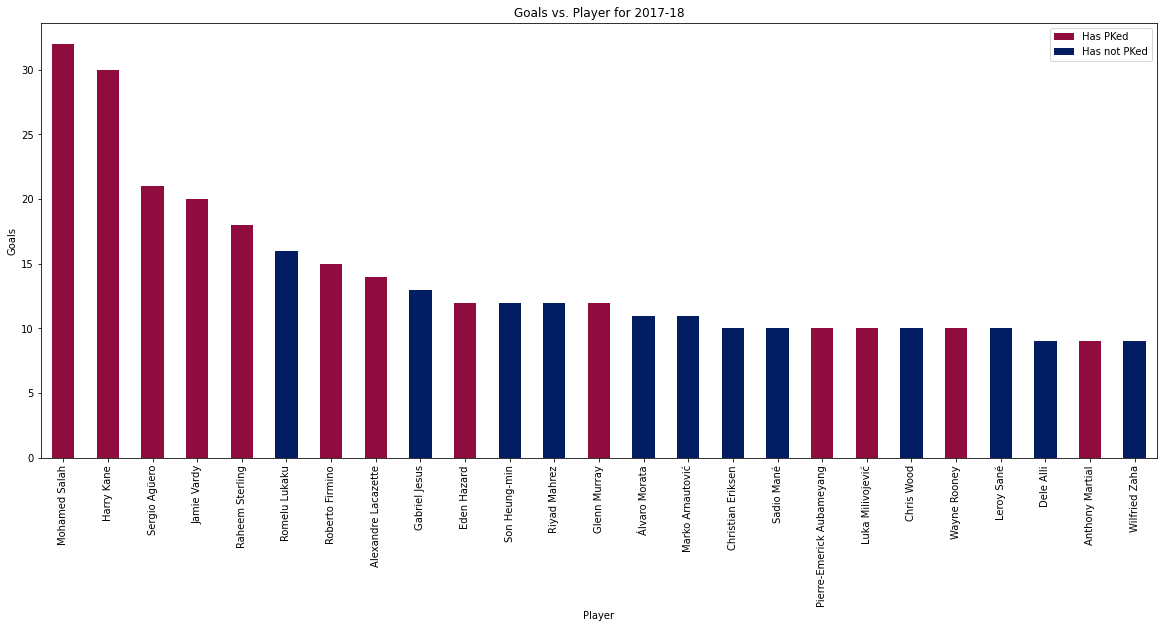

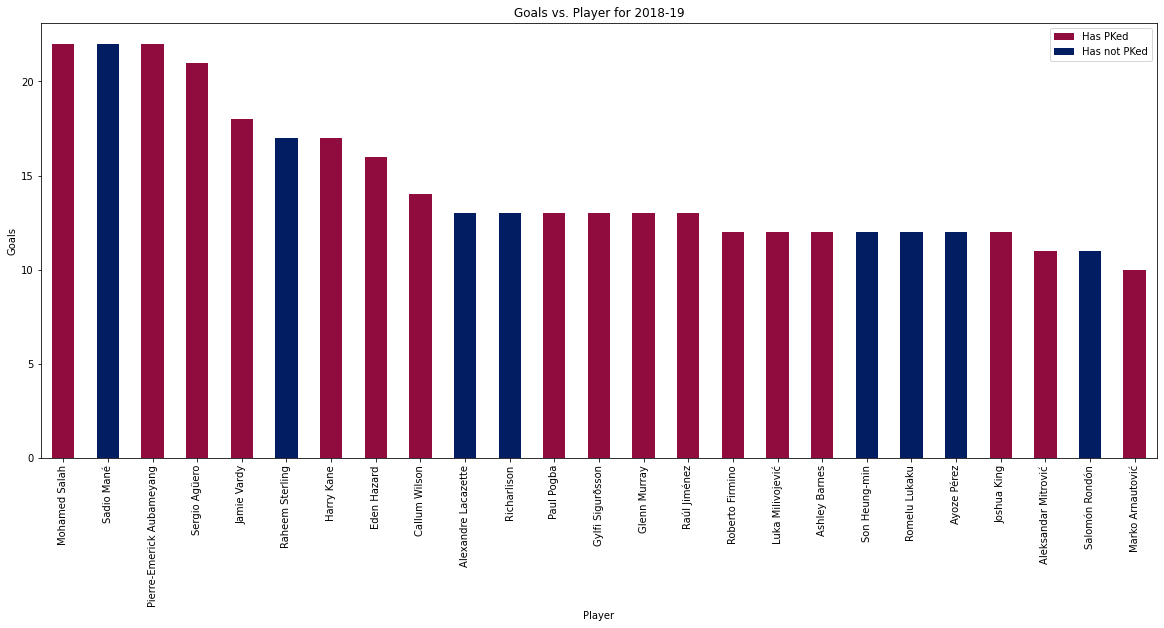

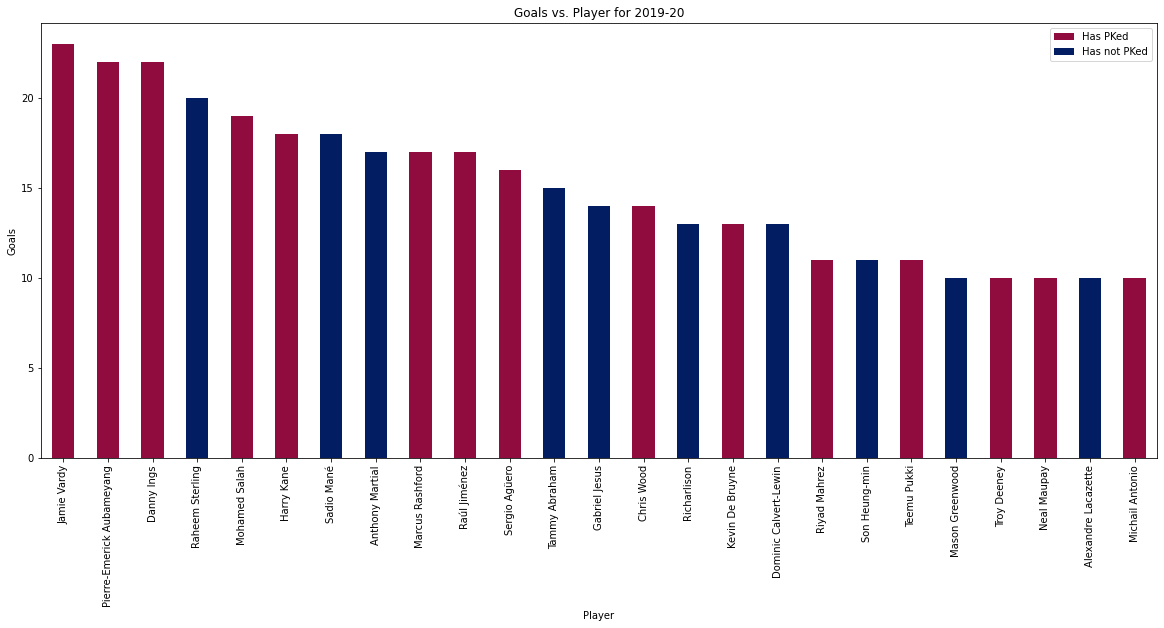

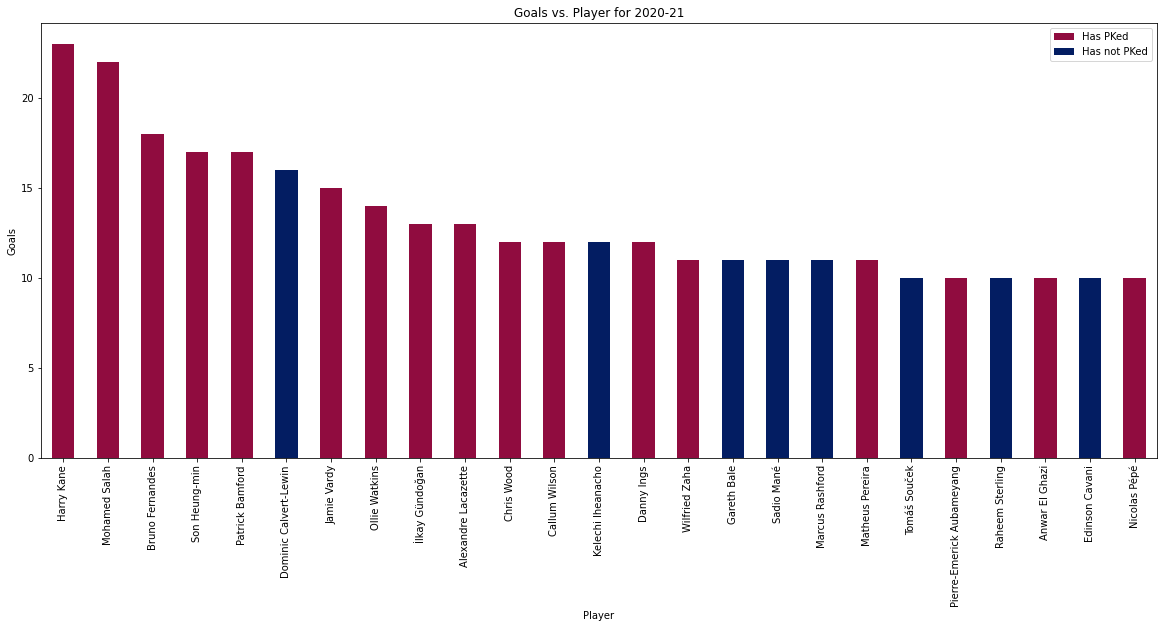

In [ ]:
from matplotlib.patches import Patch

for only_goals in only_goals_df_hist:
  only_goals['hasPK'] = (only_goals['PK'] >= 1)
  colors = {True:"#900C3F", False:"#031d62"}
  only_goals.set_index("Player")["Goals"].plot(kind="bar", x="Player", color=only_goals["hasPK"].replace(colors), figsize=(20,8)).legend(
    [
        Patch(facecolor=colors[True]),
        Patch(facecolor=colors[False])
    ], ["Has PKed", "Has not PKed"]
  )
  plt.title(f"Goals vs. Player for " + only_goals["Season"][only_goals.first_valid_index()])
  plt.xlabel("Player")
  plt.ylabel("Goals")
  plt.show()

These 4 graphs have provided some clarity over the relationship of penalties scored and top scoreres in a season. Based on these four graphs, on average, only 9 out of the top 25 players did **not** score a penalty. This supports the claim that penalties scored and goals scored have a correlation, as suggested by the heatmap. Furthermore, it helps us understand why penalties is an necessary predictor when we build our machine learning model later in this project. 

## Are teams indicators of top goalscorers?

One aspect of this dataset we wanted to explore is the impact a player's team can have on whether they will be in the top goalscorers for a particular season. Below, we plotted four graphs depicting the total number of goals scored by each team in four seperate seasons in hopes of visualising the data and comparing it to the graphs above which show the top 25 goalscorers for the same seasons. 

In [ ]:
cumulative_goals_season = []
for i in range(4):
  goals_team = {}
  season_df = dfhist[dfhist["yearIndex"] == i]
  for index, row in season_df.iterrows():
    curr_team = row["Team"]
    if curr_team not in goals_team:
      goals_team[curr_team] = season_df[season_df["Team"] == curr_team]["Goals"].sum()
  cumulative_goals_season.append(goals_team)

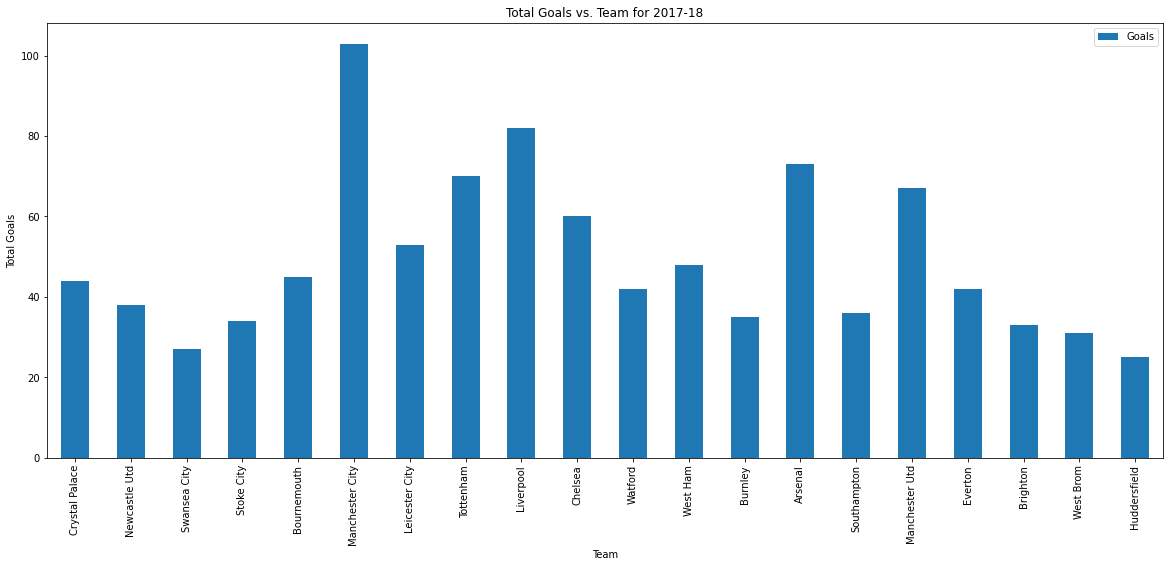

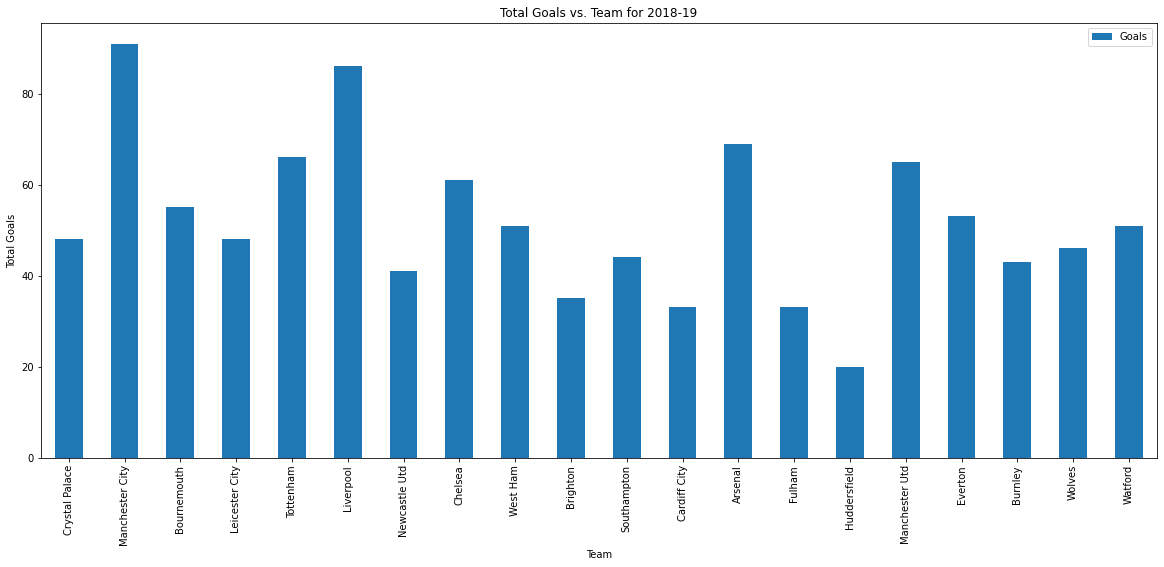

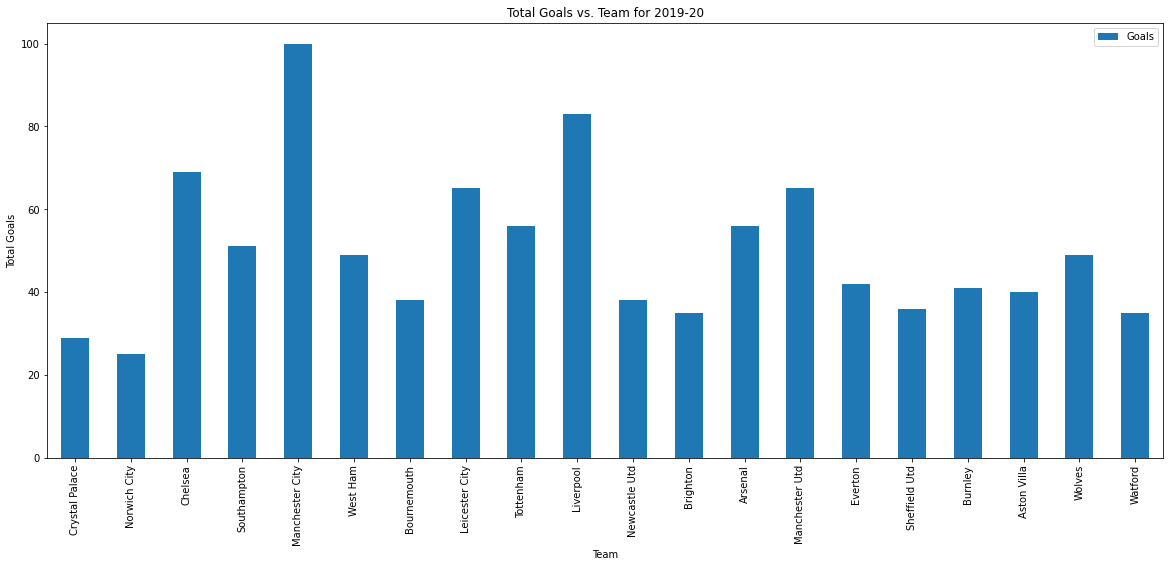

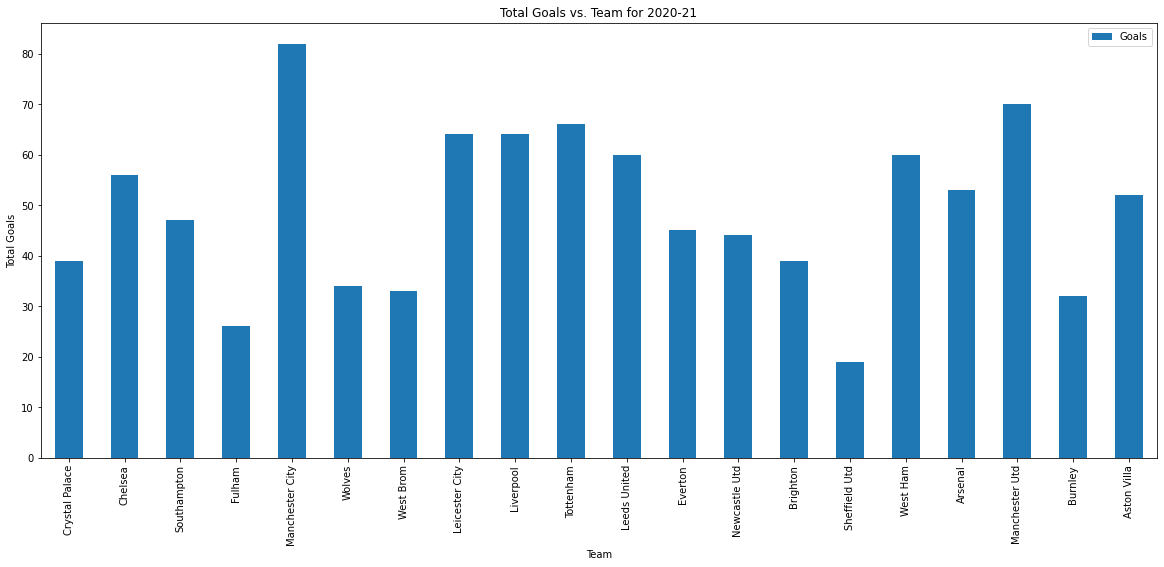

In [ ]:
seasons_dict = {0:"2017-18", 1:"2018-19", 2:"2019-20", 3:"2020-21"}
i = 0
for season_goals in cumulative_goals_season:
  curr_df = pd.DataFrame({'Goals': list(season_goals.values())}, index=list(season_goals))
  ax = curr_df.plot.bar(y='Goals', figsize=(20, 8))
  ax.set_title("Total Goals vs. Team for " + seasons_dict[i])
  ax.set_xlabel("Team")
  ax.set_ylabel("Total Goals")
  i+=1

To analyze this data, we will start by comparing the graph for total team goals for the 2017-2018 season to the top goalscorers of the same season. From our second set of graphs, we can see that the 3 teams that scored the most goals for this season were Manchester City, Liverpool, and Arsenal. The three goalscorers for this season were Mohammed Salah (Liverpool), Harry Kane (Tottenham), and Sergio Aguero (Manchester City). Using this simple comparison we notice that two of the three top scorers belong to teams that scored the most goals for this season. Since this is a small sample, we cannot say with complete confidence that there is a relation between the two, however, these graphs do support the claim that there is a correlation between team and top goalscorer. 

Moving on to the next season (2018-2019), the top 3 scoring teams were Manchester City, Liverpool, and Arsenal again! And the top 3 goalscorers for this season were Mohammed Salah (Liverpool), Sadio Mane (Liverpool), and PierePierre-Emerick Aubameyang (Arsenal). This time, we see that all three players belonged to one of the top three scoring teams, reiterating the correlation between team and top goalscorer. It is important to note that this season, Liverpool scored the second most goals, yet two of the top three goalscorers were Liverpool players, hence, the correlation might not be as strong as we initially expected since none of the top three goalscorers belong to Manchester City, who scored the most goals this season. 

For the 2019-2020 season, the top three goalscoring teams were Manchester City, Liverpool, and Chelsea. The top three goalscorers for this season were Jamie Vardy (Leicster City), Pierre-Emerick Aubameyang (Arsenal), and Danny Ings (Southampton). The data from this season contradicts the claim that teams affect top goalscorers as two of the top three goalscorers were not from any of the top three goalscoring teams! In-fact, Southampton were the 8th most goalscoring team even though their star forward Danny Ings was the third highest goalscorer. 

Lastly, we have the 2020-2021 season. This season, the top three goalscoring teams were Manchester City, Manchester United, and Tottenham. And, the top three goalscorers were Harry Kane (Tottenham), Mohammed Salah (Liverpool), and Bruno Fernandes (Manchester United). Similar to the first two seasons we looked at, two of the three top goalscorers were in one of the top goalscoring teams. 

Overall, the data clearly shows some level of correlation between the teams and the top goalscorers. However, this correlation is quite volatile and is clearly not an indicator that a top scorer has to belong to a top scoring team. The 2019-2020 season was the most contradictory season, which is what led us to the conclusion that it would not be the most effective predictor in our model, and should not be used as such.

#Machine Learning: Predicting Goals

Our goal for this section is to create an accurate predictor for the top 20 goalscorers of the 2021-2022 season in the English Premier League. In order to achieve this goal, we will use supervised learning (we have both the features, shots, SoT, PK, PKatt, xG, npxG as well as the targets (goals) that we want to predict). We are using a regression model, specifically the random forest regressor because the target value goals is a continuous variable so the task is to predict the number of goals as opposed to classification. To train the model, we give the random forest the features and the targets so it can learn to translate the input data into a prediction. To make this prediction more accurate, we adopted the holdout set method with which we trained our model on 75% of our data, and tested it against the remaining 25%. 

Here are some helpful links to learn more about these methods: 
1. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

2. https://towardsdatascience.com/types-of-machine-learning-algorithms-you-should-know-953a08248861

Our input data is the features mentioned earlier, and we will assign each player a vector that represents them which contains their Shots, SoT, PK, PKatt, xG, and npxG. Since we only have quantitative features, we don’t have to perform any encoding and can directly input the player vectors to the model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Setting up the data for training

Before we feed the data into the model, we have to separate the target data and the feature data. We use numpy arrays because that is what the regressor takes as input.

After gathering the input data for the model, we split it into training and testing datasets. The training dataset will be used to show the model the goals scored by player vectors so that it can learn the relationship between the features and target to predict the number of goals scored. The testing dataset will be used to test the model on what it has learned through the supervised learning on data that it has not seen yet, and which it has no access to the target values. By setting test size to 0.25, the model learns on 75% of the historic player data and is tested on 25%.

To learn more about the holdout set method follow this link: 
https://vitalflux.com/hold-out-method-for-training-machine-learning-model/


In [ ]:
feature_df = dfhist[['Shots','SoT','PK','PKatt','Exp_Goals','npxG']]

# Setting up targets as the column of goals
targets = np.array(dfhist['Goals'])
featurelist = list(feature_df.columns)
features = np.array(feature_df)

# Using the train_test_split function to create a holdout set, training the data on 75% and testing the model on 25% of the data
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size = 0.25, random_state = 50)

print('Training Features Shape:', train_features.shape)
print('Training Targets Shape:', train_targets.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Targets Shape:', test_targets.shape)

Training Features Shape: (1452, 6)
Training Targets Shape: (1452,)
Testing Features Shape: (484, 6)
Testing Targets Shape: (484,)


We need to verify the shape of the datasets to make sure that the training features and targets as well as the testing features and targets have the same size.

## Creating and training the RandomForest model

Now that we have everything we need to feed the model, we import the Scikit-learn random forest regressor model, instantiate it with 1000 decision trees, and train it with the fit( ) method.

To learn more about the fit() method and training a model follow this link:

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0



In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 50)
# Train the model on training data
rf.fit(train_features, train_targets)
predictions = rf.predict(test_features)

Now that our model has been trained, we make predictions on test features and compare it with the test targets. Basically, we are giving the model the shots, shots on target, penalties scored, penalties attempted, xG, and npxG and asking it to predict the goals scored. 

## Calculating error and accuracy with first model

We get the mean absolute error by subtracting the target actual values from the target predictions and taking the mean.

In [ ]:
errors = abs(predictions - test_targets)
# Print out the mean absolute error
print('Mean Absolute Error:', np.mean(errors), 'goals')

Mean Absolute Error: 0.6715351930167298 goals


The mean absolute error is 0.67, which means that on average, our model predicts within 1 goal of the actual target. This is not a very high error level, so the model seems to be quite accurate. In order to see the actual accuracy of the model, we use the R2 score from scikit-learn.

In [ ]:
# Accuracy of the model
r2_score(test_targets,predictions)

R2 Scrore: 0.9018658100945267


We get an R2 score of 0.90. This means our model is 90% accurate. We are quite pleased with this result and it means the training of our model has been successful.  

## Manually testing the accuracy of our model

Now let's see an example of a prediction with context. In their 2018-19 title winning season, Manchester City’s Sergio Aguero scored 21 goals. If we input his features for the season, our model should be able to tell us how many goals he scored. 

In [ ]:
sergiodf = dfhist.loc[dfhist['Player'] == 'Sergio Agüero']
# Taking the data for Sergio Aguero for the 2018-2019 Season
sergio = sergiodf.iloc[1]
sergiodf = pd.DataFrame(sergio).transpose()
sergiodf

,Player,Nation,Position,Team,Age,90s,Goals,Shots,SoT,SoT%,Shots per game,SoT per game,G/Sh,G/SoT,Dist,FK,PK,PKatt,Exp_Goals,npxG,npxG/Sh,Season,yearIndex
530,Sergio Agüero,ARG,FW,Manchester City,30,27.3,21,113,41,36.3,4.14,1.5,0.17,0.46,14.2,3,2,2,19.6,18.1,0.16,2018-19,1


In [ ]:
# Setting up the input for the prediction model
sergio_input = [[sergio['Shots'],sergio['SoT'],sergio['PK'],sergio['PKatt'],sergio['Exp_Goals'],sergio['npxG']]]
sergio_input

[[113.0, 41, 2, 2, 19.6, 18.1]]

In [ ]:
# Predicting the goals for Sergio Aguero based on his stats from the 2018-2019 season
sergio_goals = rf.predict(sergio_input)
int(sergio_goals[0])
# It predicts 21 goals for Sergio Aguero by the end of the 18-19 season, which is exactly how many he did score. 
# Need to add showing his actual goals.
print(f"Number of goals actually scored by Sergio Aguero: "+str(sergio['Goals'])+ " and number of goals predicted by our model: "+str(int(sergio_goals[0])))

Number of goals actually scored by Sergio Aguero: 21 and number of goals predicted by our model: 21


Excellent! Our model was able to accurately predict exactly how many goals Aguero scored during the 2018-19 season.

There is one potential issue with this prediction. Since the historic player data was split into training and testing sets, there is a chance that Aguero's feature vector for the 18-19 season was seen by the model during supervised learning. To get around this, let’s ask the model to predict the number of goals Cristiano Ronaldo has scored this season, which is not part of the historic dataset.


In [ ]:
# Testing raw data the model has not seen. Using 21-22 current day data
cristianodf = df2122.loc[df2122['Player'] == 'Cristiano Ronaldo']
cristianodf


,Player,Nation,Position,Team,Age,90s,Goals,Shots,SoT,SoT%,Shots per game,SoT per game,G/Sh,G/SoT,Dist,FK,PK,PKatt,Exp_Goals,npxG,npxG/Sh
358,Cristiano Ronaldo,POR,FW,Manchester Utd,36,11.4,7,44.0,17,38.6,3.85,1.49,0.11,0.29,14.9,2,2,2,7.2,5.7,0.14


We can observe that Ronaldo has scored 7 goals so far this season.

In [ ]:
cristiano_input = [[44,17,2,2,7.2,5.7]]
cristiano_goals = rf.predict(cristiano_input)
cristiano_goals[0]

8.095333333333334

Our model predicted that Ronaldo scored 8 goals this season. This is very close to the actual number of goals he has in the current season, there is still a small level of error which does make sense considering our model's mean absolute error is 0.67 goals. 


## Predicting the top 20 goalscorers


Now that we have confidence in our model, let us predict the top scorers in the Premier League at the end of the current season. We will feed the model the features scaled up to 38 games since that is the total number of games each team will play by the end of the season. 

In [ ]:
# Blank predictions
preds = df2122['Player']
df_preds = preds.to_frame()
# For 21-22 Predicting the top 25 scorers based on their season data till now (December 2021)
for index, row in df2122.iterrows():
  # Scale down by dividing by 18, then scale up to 38 games for the whole season
    player_vector = [[(row['Shots']/18)*38,(row['SoT']/18)*38,(row['PK']/18)*38,(row['PKatt']/18)*38,(row['Exp_Goals']/18)*38,(row['npxG']/18)*38]]
   # Append the model's prediction to the list of predictions
    df_preds.loc[index, 'Prediction'] = int(round(rf.predict(player_vector)[0]))

# Sort the prediction
df_preds = df_preds.sort_values(by='Prediction', ascending=False)
df_preds = df_preds.reset_index(drop=True)
df_preds = df_preds.shift()[1:]
# Output top 20 predicted goalscorers
df_preds.head(20)

,Player,Prediction
1,Mohamed Salah,22.0
2,Sadio Mané,21.0
3,Diogo Jota,20.0
4,Cristiano Ronaldo,16.0
5,Pierre-Emerick Aubameyang,13.0
6,Emmanuel Dennis,12.0
7,Ollie Watkins,12.0
8,Jarrod Bowen,11.0
9,Raphael Dias Belloli,11.0
10,Ivan Toney,10.0


There we go! It is no surprise that Mohamed Salah, the current leading goalscorer, tops the table.

## Importance of xG

In our exploratory data analysis, we saw that expected goals had the highest correlation to goals. With a correlation score of 0.94, we were initially concerned that such a strong correlation may make our model’s predictions solely based on the expected goals feature passed into the model. We had to ask ourselves, could expected goals be too good of an indicator?

According to FBref, "Expected goals (xG) is the probability that a shot will result in a goal based on the characteristics of that shot and the events leading up to it". For example, variables like location of the shot, body part, and type of attack are taken into consideration. You can read more about FBref's explanation for xG [here](https://fbref.com/en/expected-goals-model-explained/).

The xG stat that we use in our data is the cumulative expected goals of a player for a season. Expected goals is a great predictor of goals because there is a heavy amount of probability involved in its calculation which is based on expectation that professional footballers will score chances that they are expected to score.

### Getting feature importance for our first model

Now let’s see how much our model relies on xG to make predictions.


In [ ]:
# Get numerical feature importances
# Use randomforrest built-in function feature_importance to find the which features are most improtant
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(featurelist, importances)]

for feature in feature_importances:
  print(feature[0]+" Importance: "+str(feature[1]))

Shots Importance: 0.03
SoT Importance: 0.08
PK Importance: 0.0
PKatt Importance: 0.0
Exp_Goals Importance: 0.81
npxG Importance: 0.06


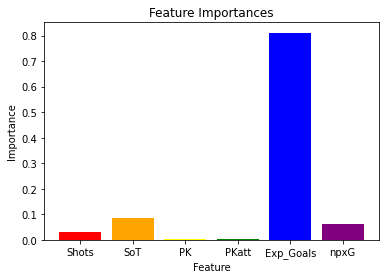

In [ ]:
# Make a bar chart
plt.bar(featurelist, importances, color=['red','orange','yellow','green','blue','purple'])
plt.ylabel('Importance') 
plt.xlabel('Feature') 
plt.title('Feature Importances')
plt.show()

After plotting the feature importances, we see that the model relies heavily on expected goals to predict the results. When we include xG, our model performs well and maintains a low error and high accuracy level. But, now we want to measure its performance with the "less important" features. We will repeat the prediction model process removing the feature xG and observe the results.

## Creating a second model (excluding xG) and calculating its accuracy and error


After recognizing our prediction model's dependence on the xG feature, we will re-create the RandomForrest model, but this time exclude xG.

In [ ]:
# We can see the feature lsit no longer has xG
feature_df = dfhist[['Shots','SoT','PK','PKatt','npxG']]

targets = np.array(dfhist['Goals'])
featurelist = list(feature_df.columns)
features = np.array(feature_df)

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size = 0.25, random_state = 50)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 50)
# Train the model on training data
rf2.fit(train_features, train_targets)
predictions = rf2.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_targets)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for updated model excluding xG:', np.mean(errors), 'goals')

# Accuracy score
print("\nThe accuracy for our updated model excluding xG: "+str(r2_score(test_targets,predictions)))

Mean Absolute Error for updated model excluding xG: 0.6528736534658308 goals

The accuracy for our updated model excluding xG: 0.9042585233688856


## Predicting the top 20 goalscorers with our second model

In [ ]:
# Predicting 21-22 top 20 scorers based on model WITHOUT xG
preds = df2122['Player']
df_preds = preds.to_frame()
for index, row in df2122.iterrows():
    player_vector = [[(row['Shots']/18)*38,(row['SoT']/18)*38,(row['PK']/18)*38,(row['PKatt']/18)*38,(row['npxG']/18)*38]]
    df_preds.loc[index, 'Prediction'] = int(round(rf2.predict(player_vector)[0]))

df_preds = df_preds.sort_values(by='Prediction', ascending=False)
df_preds = df_preds.reset_index(drop=True)
df_preds = df_preds.shift()[1:]
df_preds.head(20)

,Player,Prediction
1,Mohamed Salah,22.0
2,Sadio Mané,19.0
3,Diogo Jota,17.0
4,Cristiano Ronaldo,15.0
5,Pierre-Emerick Aubameyang,13.0
6,Raphael Dias Belloli,12.0
7,Ollie Watkins,12.0
8,Emmanuel Dennis,12.0
9,Mason Mount,11.0
10,Joshua King,11.0


After running the model without xG, we still get very similar results. The mean absolute error is actually less and the accuracy is the same. In fact most of the predictions made by both models is also the same.

This shows us that there is another feature that is almost as important to this model as xG was. Lets try to find out which feature this is using the same steps we did previously. 

### Getting feature importance for our second model

In [ ]:
# Get numerical feature importances
importances = list(rf2.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(featurelist, importances)]

for feature in feature_importances:
  print(feature[0]+" Importance: "+str(feature[1]))

Shots Importance: 0.04
SoT Importance: 0.3
PK Importance: 0.02
PKatt Importance: 0.02
npxG Importance: 0.62


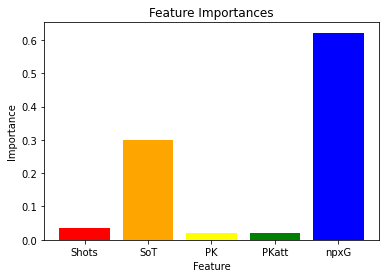

In [ ]:
# Make a bar chart
plt.bar(featurelist, importances, color=['red','orange','yellow','green','blue'])
plt.ylabel('Importance') 
plt.xlabel('Feature') 
plt.title('Feature Importances')
plt.show()

After plotting the feature importance without xG, we observe that there is a high importance for non-penalty expected goals (npxG). This makes sense because npxG and xG are quite similar, only differing in the 0.76 xG for each penalty attempt. We also know this from the correlation matrix, which showed a correlation of 0.98 for xG and npxG. We will finally repeat the prediction process excluding npxG as well.

## Creating a third model (excluding xG and npxG) and calculating its accuracy and error



After recognizing our prediction model's dependence on both the xG and npxG features, we will re-create the RandomForrest model again, but this time exclude xG and npxG.

In [ ]:
# We see the predictors don't have xG or non-penalty xG
feature_df = dfhist[['Shots','SoT','PK','PKatt']]

targets = np.array(dfhist['Goals'])
featurelist = list(feature_df.columns)
features = np.array(feature_df)

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size = 0.25, random_state = 50)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf3 = RandomForestRegressor(n_estimators = 1000, random_state = 50)
# Train the model on training data
rf3.fit(train_features, train_targets)
predictions = rf3.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_targets)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors), 'goals')

# Print accuracy, note it is still accurate, almost equal accuracy to model with xg and non-pen xg
print("\n"+str(r2_score(test_targets,predictions)))


Mean Absolute Error: 0.7413479991757604 goals

0.8662449332471283


## Predicting the top 20 goalscorers with our third model

In [ ]:
preds = df2122['Player']
df_preds = preds.to_frame()
for index, row in df2122.iterrows():
    player_vector = [[(row['Shots']/18)*38,(row['SoT']/18)*38,(row['PK']/18)*38,(row['PKatt']/18)*38]]
    df_preds.loc[index, 'Prediction'] = int(round(rf3.predict(player_vector)[0]))

df_preds = df_preds.sort_values(by='Prediction', ascending=False)
df_preds = df_preds.reset_index(drop=True)
df_preds = df_preds.shift()[1:]
df_preds.head(20)

,Player,Prediction
1,Mohamed Salah,23.0
2,Cristiano Ronaldo,21.0
3,Emmanuel Dennis,16.0
4,Pierre-Emerick Aubameyang,14.0
5,Raphael Dias Belloli,13.0
6,Jarrod Bowen,13.0
7,Leandro Trossard,13.0
8,Ollie Watkins,12.0
9,Teemu Pukki,11.0
10,Sadio Mané,11.0


After running the model excluding both xG and npxG, we observe that there is a slightly higher error and lower accuracy. It is interesting to note that Diogo Jota, who is currently second in scoring with 9 goals, is nowhere to be found in the top 20 predicted scorers this season. It is very unlikely that he will not score one more goal, if not more for the rest of the season, suggesting that xG and npxG are very strong predictors of goals.

### Getting feature importance for our third model

In [ ]:
# Get numerical feature importances
importances = list(rf3.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(featurelist, importances)]

for feature in feature_importances:
  print(feature[0]+" Importance: "+str(feature[1]))

Shots Importance: 0.07
SoT Importance: 0.87
PK Importance: 0.03
PKatt Importance: 0.04


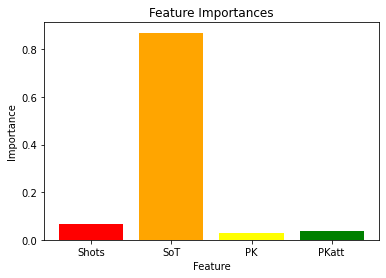

In [ ]:
# Make a bar chart
plt.bar(featurelist, importances, color=['red','orange','yellow','green'])
plt.ylabel('Importance') 
plt.xlabel('Feature') 
plt.title('Feature Importances')
plt.show()

When we look at the plot of the importance for each feature, we see that shots on target is now the most important feature. This reflects the fact that there is a heirarchical importance of features. This is also supported by the correlation scores for each feature as those are closely related to these importance scores. 


## Findings from predictive model

While we did create three different instances of the RandomForestRegressor model, the dataset we used provided enough data such that the trained models maintained low levels of error and high levels of accuracy. These models also predicted an extremely similar list of top 20 goalscorers for this season, with all of them having Mohammed Salah as their predicted top scorer of the season. This is a very feasible prediction as Salah is having an amazing season and is on pace to be the top goalscorer. 

While the models had an average accuracy of 89%, we believe the top 10 scorers the models predicted will be very accurate, this claim is simply based on the current highest goalscorers and our personal predictions. We are excited to see how accurate our model was once the season ends!

# Conclusion

Now that we have explored and learned so much about this data, we will do our best to briefly showcase what we have learned from this data, how we built our machine learning model, and the outcomes of this project!

Based on our observations throughout our analysis and modeling, we can safely say that it is possible to predict the top goalscorers wiht a relatively high level of certainty. There are many variables that play a role in this, some of the major ones being shots, shots on target, penalties attempted, penalties scored, expected goals, and non-penalty expected goals. All of these variables maintain a correlation with the number of goals a player scores during a single season in the English Premier League. 

Our models showed the correlation score for these different variables, and we were able to investigate the type of relationship these features had with the goals scored. Additionally, we gained a much better understanding of how penalties relate to the goals scored by a player, this was especially important because our plots indicated a strong correlation between the two features, however we did not recognize this until we looked at how common it was for top goalscorers to also be their team's appointed penalty taker. 

Our analysis also helped us answer the question of whether or not a team can help predict the goalscorer. Our plots led us to the conclusion that there is some correlation between the top goalscorer and the team they play for, however, there was not enough evidence from the datasets we used to justify having the team as an additional predictor. On top of this, football is a very unpredectible sport, and successfull teams often fail, while less successful teams end up winning it all! This makes predictions based on teams quite uncertain. 

Finally, we had the opportunity to use supervised learning and built a RandomForest model to predict the top 20 goalscorers for the 2021-2022 season in the EPL. To make our predictions more accurate, we used the holdout set method and managed to get an prediction accuracy of 83% which we were very pleased with. We also took the opportunity to remove some of the important features in our prediction model to see how they affected our prediction results and were not suprised to see an increase in error and reduced accuracy when we did so. 

Overall, we were very pleased with the results of our project and prediction model. It gave us a chance to explore data in an interesting field we are interested in and learn more about creating, training and predicting using machine learning models. However, this project only scratches the surface on such an informative dataset. This project could be expanded by exploring alternative models such as linear regressions, we could also try and 